# 16.32 - Redes Neuronales en Bioingeniería 

André Torvestad - Septiembre 2022


## TP1:

# **Parte 1/2: Clasificación**

Partes:
1. Análisis exploratorio de datos (EDA)
2. Aplicacion de los modelos del clase
3. Evaluacion de métricas: Micro-macro F1-score 
4. Un problema de clasificaión binario

El objecto del trabajo es crear dos modeles: un para clasificar y un para regresar. Los data sets son "*Yeast Data Set*" y "*Physicochemical Properties of Protein Tertiary Structure Data Set*". La primera para clasificación, la segunda para regresión. Primero se hacer un EDA para conocer los datos. Después, se aplican los modelos vistos en clase. Los modelos se evaluarán según la puntuación micro-macro F1 y el MSE, respectivamente. Por el clasificacion, los tres clases más distintas van a ser elegido para clasificar. También, los dos más distintas van a ser elegido por un problema binario. 


---


Bibliografía:

https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f 


Vivek, Y. (2016) *Why dropouts prevent overfitting in deep neural networks* Available from: https://vivek-yadav.medium.com/why-dropouts-prevent-overfitting-in-deep-neural-networks-937e2543a701 (Accessed: 21.09.22)


In [1]:
# Importar librarias 
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.decomposition import PCA

sns.set_theme()
drive.mount('/content/drive')

Mounted at /content/drive


## YEAST Data Set
Clasificación para predecir los sitios de localización celular de las proteínas. Los datos tiene un nombre, 8 características y un clase. Los características son: 

1. mcg: McGeoch's method for signal sequence recognition.
2. gvh: von Heijne's method for signal sequence recognition.
3. alm: Score of the ALOM membrane spanning region prediction program.
4. mit: Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins.
5. erl: Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute.
6. pox: Peroxisomal targeting signal in the C-terminus.
7. vac: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins.
8. nuc: Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.



### Análisis de exploratorio de datos

Análisis para explorar los datos y prepararlo para los modelos de clasificacion. 

In [2]:
# Para leer los datos hay "read_fwf" que puede leer .data files y los demilitan. 
dt = pd.read_fwf('/content/drive/MyDrive/Neural Networks/TP 1/yeast.data')

dt.shape # Shape del dataframe

(1483, 10)

In [3]:
dt.head()

,ADT1_YEAST,0.58,0.61,0.47,0.13,0.50,0.00,0.48,0.22,MIT
0,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
1,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
2,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
3,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
4,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT


Vemos que no tenemos los nombres correctos en las columnas. Hacemos un header column con nombres de la informacion en 'yeast.names'.



In [4]:
dt.columns = ['name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac','nuc','class']
dt.head()

,name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
1,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
2,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
3,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
4,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT


Dice en el informacion que no hay valores NaN, pero lo comprobamos para estar seguro. Verificamos que no hay. 

In [5]:
dt.isna().sum() 

name     0
mcg      0
gvh      0
alm      0
mit      0
erl      0
pox      0
vac      0
nuc      0
class    0
dtype: int64

Para conocer a los datos, usamos el funcion 'describe()'. Con este tenemos informacion sobre los valores por cada dato. Vemos que los valores medios son muy paracidos. Lo vamos a ver en un boxplot. 

In [6]:
dt.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000
mean,0.500067,0.499858,0.500054,0.261274,0.504720,0.007505,0.499899,0.276237
std,0.137330,0.123933,0.086696,0.137102,0.048367,0.075708,0.057814,0.106516
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


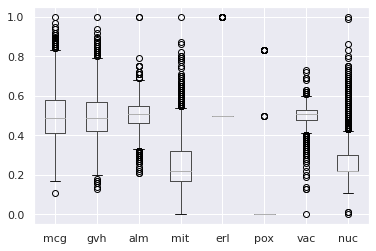

In [7]:
dt.boxplot()

Como vemos en el boxplot muchas de los valores son muy parecidas, pero tenemos que normalisar los valores. Para hacer este usamos el StandardScaler. Esto estandariza las características eliminando la media y escalando a la unidad de varianza. Usamos el funcion 'iloc' para evitar normalisar el nombre y la clase.

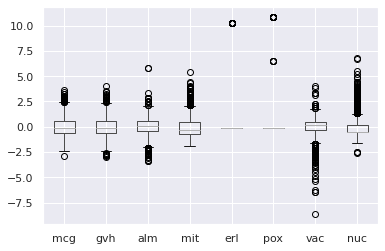

In [8]:
nrm = StandardScaler() 
valoresCols = len(dt.columns)-1
nrm.fit(dt.iloc[:,1:valoresCols])

dt.iloc[:,1:valoresCols] = pd.DataFrame(
                                nrm.transform(dt.iloc[:,1:valoresCols]),
                                columns = dt.iloc[:,1:valoresCols].columns[:],
                               index=dt.iloc[:,1:valoresCols].index
                               )

dt.boxplot()

Ahora vemos que los valores son normalisados y estan centrado cerca de zero. 


---

Contamos las clases para ver el distribucion. Como vemos, hay algunas que son muy grandes (CYT, NUC, MIT) y otras que son muy pocos (ERL, POX, VAC). Entonces tenemos que pensar en que podemos tener problemas con las clases pequenas. Si el clasificador nunca adivina a ERL, POX o VAC todavia va a tener un precisión buena. 

In [9]:
dt['class'].value_counts() # contar las clases

CYT    463
NUC    429
MIT    243
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: class, dtype: int64

Hacemos un pairplot para visualizar los clusters de datos. Cuanto más distintos sean los clústeres entre sí, más fácil será clasificarlos correctamente. 

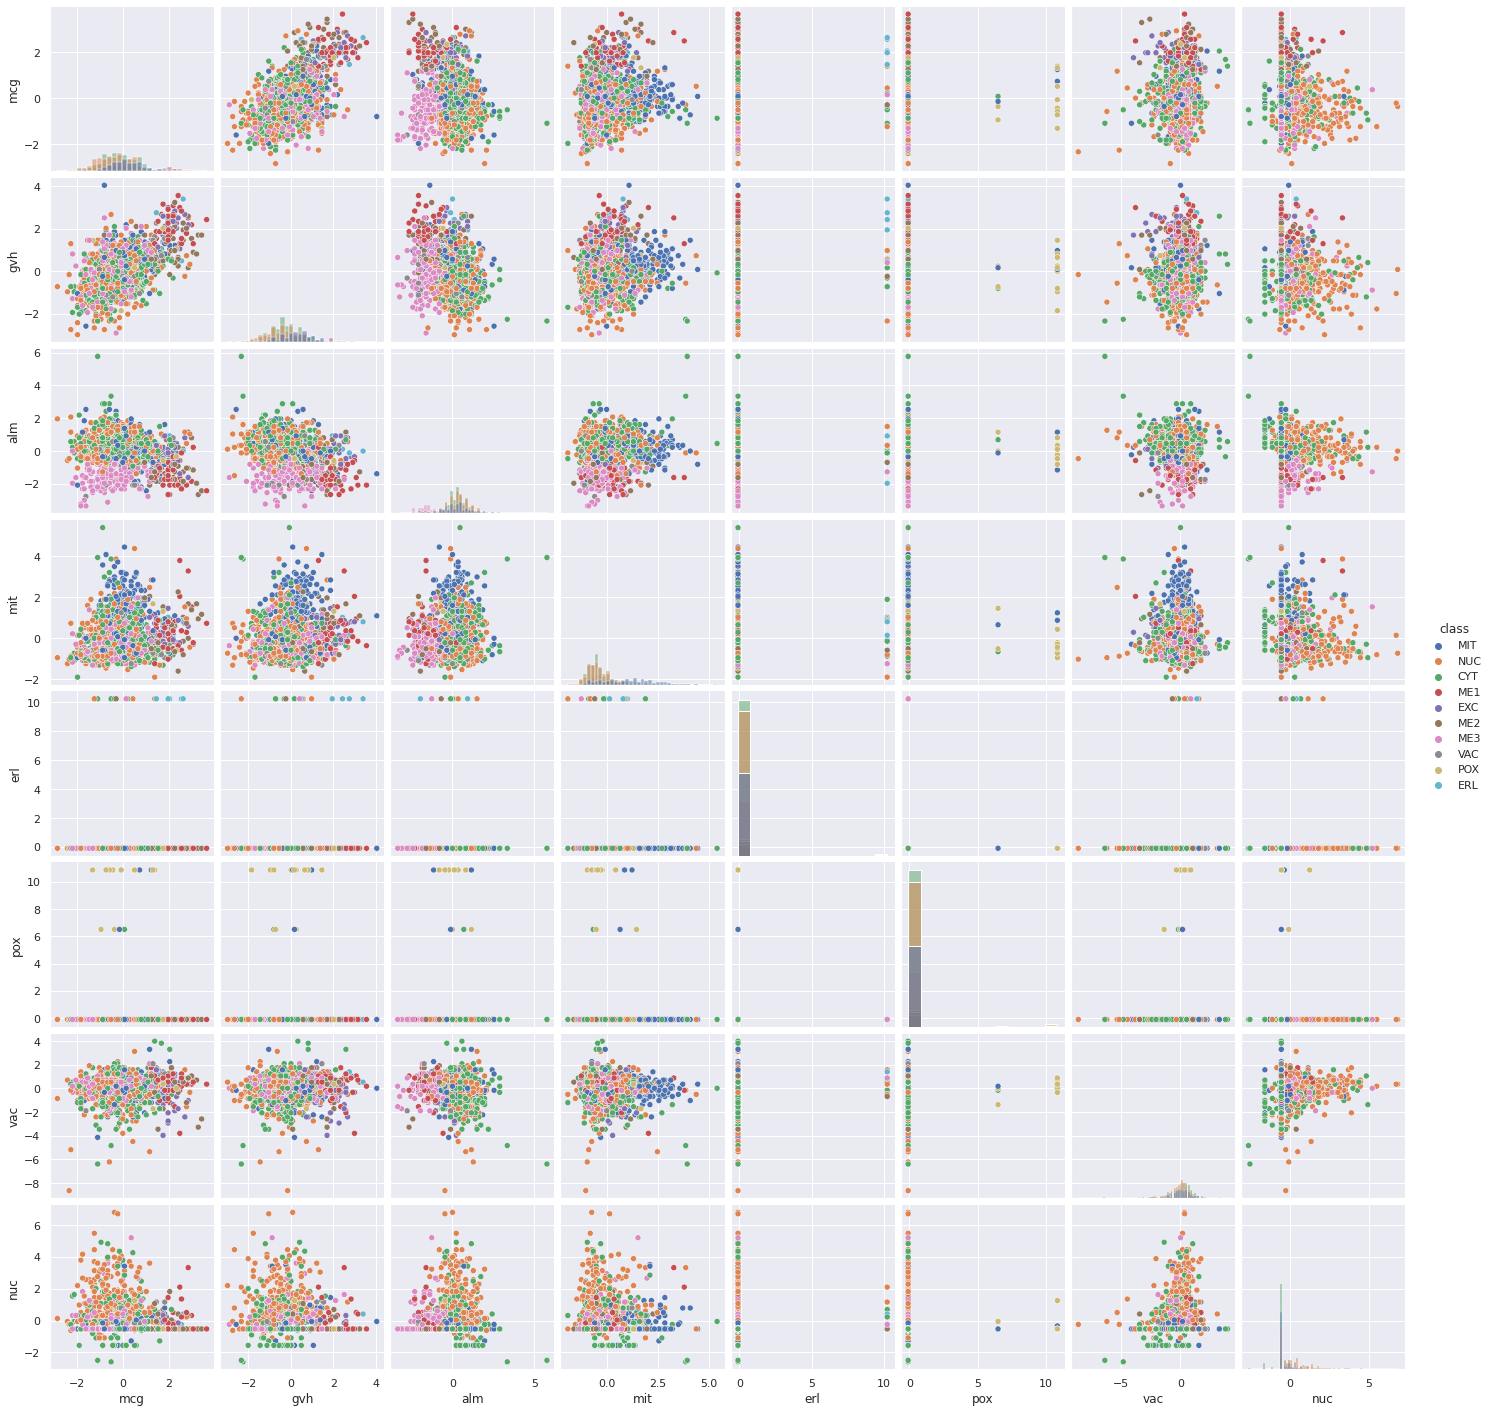

In [10]:
sns.pairplot(dt, hue="class",  diag_kind="hist")

En el gráfico de pares vemos que los clusters no se distinguen fácilmente entre sí. Esto significa que será difícil realizar una clasificación de los datos, ya que las clases tienen features similares. 

Sin embargo, el número de features hace que el gráfico de pares sea difícil de leer. Por ello, es necesario utilizar una proyección t-SNE, una técnica de reducción de la dimensionalidad no lineal que se utiliza para visualizar los clusters.



In [11]:
dt_features = dt.iloc[:,1:-1]
dt_class = dt.iloc[:,-1]

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
Xp = pd.DataFrame(tsne.fit_transform(dt_features))
Xp['class'] = dt_class.to_list()
Xp.head()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,0,1,class
0,-18.503376,13.170080,MIT
1,-24.869934,3.001562,MIT
2,0.157547,-6.714701,NUC
3,2.389249,-36.934608,MIT
4,-34.762207,-35.036160,CYT


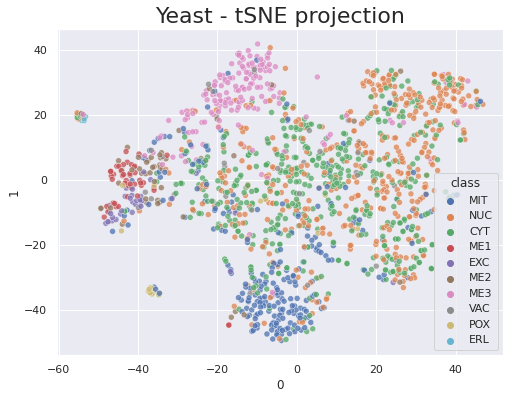

In [13]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(data=Xp, hue='class', x=0, y=1, alpha=0.75)
plt.title('Yeast - tSNE projection', size=22)
plt.show()

Como se observa en la proyección t-SNE, algunas de las clases podrían estar bien diferenciadas. El mayor reto parece estar relacionado con NUC y CYT, que están dispersos por toda la parcela. Como éstas representan dos de las clases más grandes, podría haber un problema de sobreclasificación de las mismas. En cambio, MIT y ME3 parecen distinguirse fácilmente de las demás clases. 

Por eso, elegimos NUC, MIT, ME1 y ME3 para clasificar. CYT evitamos porque es muy parecido de NUC en nuestra grafico. 

In [14]:
dt_chosen = dt[(dt["class"] == 'NUC') | (dt["class"] == 'MIT') | (dt["class"] == 'ME1') | (dt["class"] == 'ME3')]
print(dt_chosen.shape, dt.shape)

(879, 10) (1483, 10)


In [15]:
dt_chosen['class'].value_counts()

NUC    429
MIT    243
ME3    163
ME1     44
Name: class, dtype: int64

A continuación, dividimos los datos en conjunto de train y de test. Hacemos 30% del dato para test, que es práctica habitual. 

In [16]:
from sklearn.model_selection import train_test_split
(x_train, x_test,y_train,y_test) = train_test_split(dt_chosen.iloc[:,1:valoresCols],dt_chosen.iloc[:,len(dt_chosen.columns)-1],test_size=0.3, stratify=dt_chosen["class"])

In [17]:
print("Length of datasets: train -", x_train.shape[0],", test -",x_test.shape[0])

Length of datasets: train - 615 , test - 264


In [18]:
x_train.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
458,0.509402,0.889018,0.576300,2.982195,-0.097623,-0.099165,-0.344305,-0.528147
876,-0.801752,-0.483152,0.460916,-0.155225,-0.097623,-0.099165,0.174778,2.007528
937,1.602031,0.081859,0.230147,-1.322637,-0.097623,-0.099165,0.693860,-0.528147
1321,0.727928,0.566154,1.499376,-0.301152,-0.097623,-0.099165,0.001750,2.007528
80,-0.000491,0.646870,-0.462161,1.449967,-0.097623,-0.099165,-0.690360,-0.528147


In [19]:
y_train.head()

458     MIT
876     NUC
937     NUC
1321    NUC
80      MIT
Name: class, dtype: object

Ahora tenemos un data set está listo para los modelos. 



### Modelos para Clasificar - 4 clases

Vamos a crear MLP's para clasificar clases. Vamos a ver a modelos diferentes y evaluar los valores de macro- y micro-F1 score, y tambien veremos al tiempo que necesita el modelo. 

Las parametros que vamos a cambiar son:

- Layers
- Neurons
- Epochs 
- Batch size

También vamos a usar dropout, porque es evidente que es bueno para evitar overfitting (Vivek, 2016). 

Analizamos la loss-function para ver si el modelo se ajusta poco o demasiado. Si el modelo no converge al estado estacionario, el modelo underfits y hay que aumentar su complejidad. Si el modelo converge y luego el valor de la pérdida del conjunto de datos de prueba empieza a aumentar, el modelo overfits y la complejidad debe disminuir. 

La complejidad puede aumentarse añadiendo capas o aumentando el número de neuronas en cada capa. El número de épocas puede aumentarse si el modelo no se ajusta, para permitir un mayor aprendizaje. Esto puede hacer que el modelo se ajuste mejor. 

Como se indica en el teorema de la no gratuidad, no existe una solución óptima global para todos los problemas de las redes neuronales. Por tanto, la red neuronal debe adaptarse específicamente al problema en cuestión.



In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from numpy import argmax
from IPython.display import clear_output
from sklearn.metrics import f1_score
from tensorflow import argmax as tf_argmax
from keras import backend as K
import keras 
import tensorflow as tf
!pip install tensorflow_addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 16.4 MB/s 


In [21]:
# Cambiamos las clases de string a one-hot encoding

id = dt_chosen['class'].unique()
d = {p[1]:p[0] for p in enumerate(id)}

y_train2 = y_train.replace(d)
y_test2 = y_test.replace(d)

y_train_oh = tf.one_hot(y_train2,4)
y_test_oh = tf.one_hot(y_test2,4)

NUC, MIT, ME1 y ME3

Sequential() no tiene un opcion para calcular f1-scores. Por lo que hacemos dos funciones para calcular macro- y micro-f1 score. Por el micro usamos el funcion de tensorflow_addons, *F1Score*, con average='micro'. Este funcion no funciona con average='macro', por eso hacemos un funcion para calcularlo. 

In [22]:
# Crear un función para calcular el macro- y el micro-f1 score
n_classes = 4
micro_f1 = tfa.metrics.F1Score(num_classes=n_classes,
                            average='micro',
                            threshold=0.5,
                            name='micro_f1')

macro_f1 = tfa.metrics.F1Score(num_classes=n_classes,
                            average='macro',
                            threshold=0.5,
                            name='macro_f1')

In [23]:
# Función para graficar los resultados
def plot_results(history, model_name):
  fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20, 8))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model loss', size=20)
  ax1.set_ylabel('Loss', size=16)
  ax1.set_xlabel('Epoch', size=16)
  ax1.set_xticks(range(0, epochs+10, 10))
  ax1.legend(['Train', 'Validation'], loc='upper right')

  ax2.plot(history.history['macro_f1'])
  ax2.plot(history.history['val_macro_f1'])
  ax2.set_title('Macro-F1', size=20)
  ax2.set_ylabel('Macro-F1', size=16)
  ax2.set_xlabel('Epoch', size=16)
  ax2.set_xticks(range(0, epochs+10, 10))
  ax2.legend(['Train', 'Validation'], loc='upper left')

  ax3.plot(history.history['micro_f1'])
  ax3.plot(history.history['val_micro_f1'])
  ax3.set_title('Micro-F1', size=20)
  ax3.set_ylabel('Micro-F1', size=16)
  ax3.set_xlabel('Epoch', size=16)
  ax3.set_xticks(range(0, epochs+10, 10))
  ax3.legend(['Train', 'Validation'], loc='upper left')

  fig.suptitle(model_name+': Learning curves', size=20)

  plt.show()

def print_results(result,metrics_evaluate):
  print('Results:\nLoss',np.round(result[0],3))
  for i in range(len(result)-1):
    print(metrics_evaluate[i],np.round(result[i+1],3))


In [24]:
n_features = len(x_train.columns)
n_classes = len(dt_chosen['class'].value_counts())
print('Number of inputs:',n_features,'| Number of outputs:', n_classes)

metrics_evaluate = ['Recall', 'Precision', 'Accuracy', macro_f1, micro_f1]

Number of inputs: 8 | Number of outputs: 4


#### Modelo 1 - Un modelo simple 

Hacemos primero un modelo simple para verificar que todo funcciona y para evitar overfitting. Después hacemos el modelo más y más complicado hasta vemos que tenemos un loss buena. 


In [25]:
model = Sequential()
model.add(Dense(n_features, input_dim=n_features, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=metrics_evaluate)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


Vemos que tenemos 162 parametros para entrenar. 

In [26]:
%%time
epochs = 11
batch_size = 100

history = model.fit(x_train, y_train_oh, epochs=epochs, batch_size=batch_size, validation_split=0.2);
result = model.evaluate(x_test,y_test_oh)
clear_output()

CPU times: user 2.89 s, sys: 114 ms, total: 3.01 s
Wall time: 3.44 s


Results:
Loss 1.231
Recall 0.083
Precision 0.71
Accuracy 0.504
F1Score(name=macro_f1,dtype=float32,num_classes=4,average=macro,threshold=0.5) 0.13
F1Score(name=micro_f1,dtype=float32,num_classes=4,average=micro,threshold=0.5) 0.149


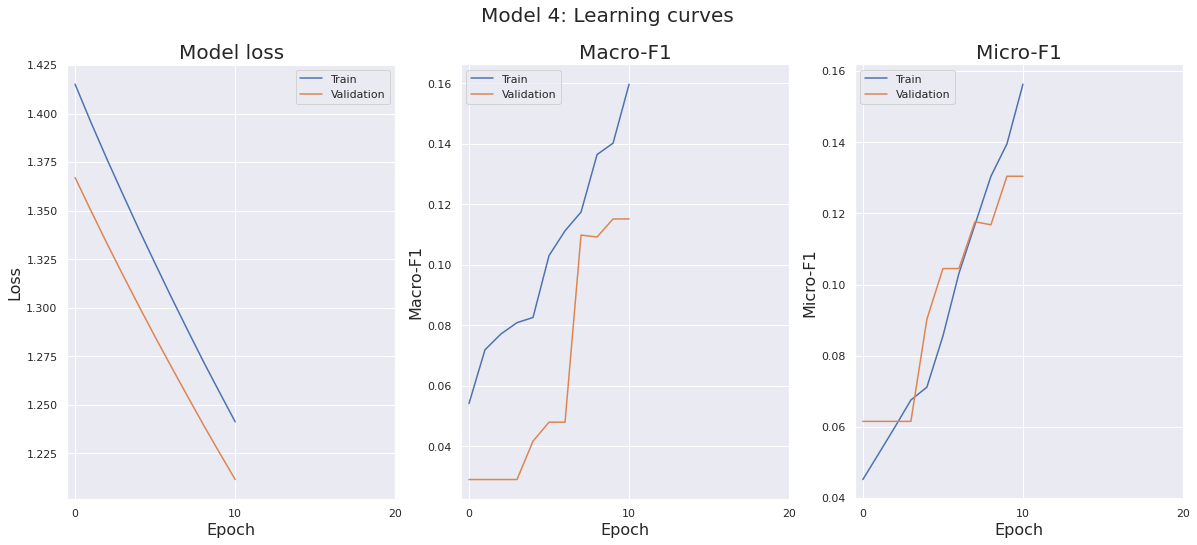

In [27]:
print_results(result, metrics_evaluate)
plot_results(history, 'Model 4')

Vemos que el modelo esta underfitting, y por eso vamos a aumentar la complexidad. 

#### Modelo 2 - Más complexidad

In [28]:
model = Sequential()
model.add(Dense(3*n_features, input_shape=(n_features,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2*n_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=metrics_evaluate)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 24)                216       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                400       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 4)                

Ahora tenemos 842 parametros para entrenar - 5 veces más que el modelo simple. 

In [29]:
%%time
epochs = 100
batch_size = 100

history = model.fit(x_train, y_train_oh, epochs=epochs, batch_size=batch_size, validation_split=0.2);
result = model.evaluate(x_test,y_test_oh)
clear_output()

CPU times: user 8.83 s, sys: 329 ms, total: 9.16 s
Wall time: 22.4 s


Results:
Loss 0.574
Recall 0.78
Precision 0.831
Accuracy 0.795
F1Score(name=macro_f1,dtype=float32,num_classes=4,average=macro,threshold=0.5) 0.804
F1Score(name=micro_f1,dtype=float32,num_classes=4,average=micro,threshold=0.5) 0.805


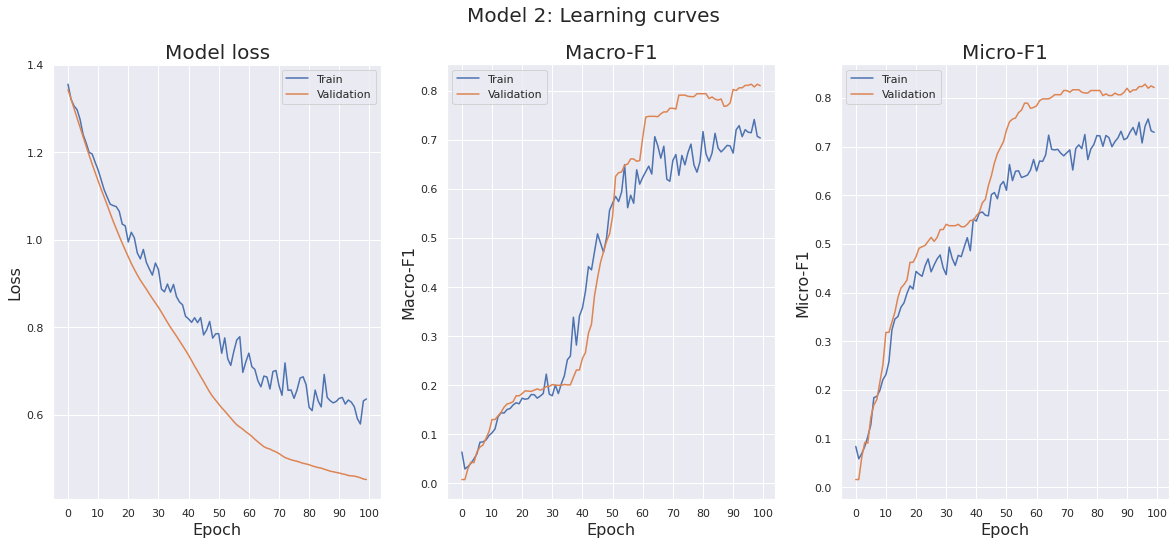

In [30]:
print_results(result, metrics_evaluate)
plot_results(history, 'Model 2')

#### Modelo 3 - más complicado



In [31]:
model = Sequential()
model.add(Dense(20*n_features, input_shape=(n_features,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5*n_features, activation='relu'))
model.add(Dense(n_features, activation='relu'))
model.add(Dense(n_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=metrics_evaluate)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 160)               1440      
                                                                 
 dropout_3 (Dropout)         (None, 160)               0         
                                                                 
 dense_7 (Dense)             (None, 40)                6440      
                                                                 
 dense_8 (Dense)             (None, 8)                 328       
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 4)                

In [32]:
%%time
epochs = 70
batch_size = 100

history = model.fit(x_train, y_train_oh, epochs=epochs, batch_size=batch_size, validation_split=0.2);
result = model.evaluate(x_test,y_test_oh)
clear_output()

CPU times: user 8.87 s, sys: 312 ms, total: 9.18 s
Wall time: 17.5 s


Results:
Loss 0.638
Recall 0.761
Precision 0.807
Accuracy 0.784
F1Score(name=macro_f1,dtype=float32,num_classes=4,average=macro,threshold=0.5) 0.781
F1Score(name=micro_f1,dtype=float32,num_classes=4,average=micro,threshold=0.5) 0.784


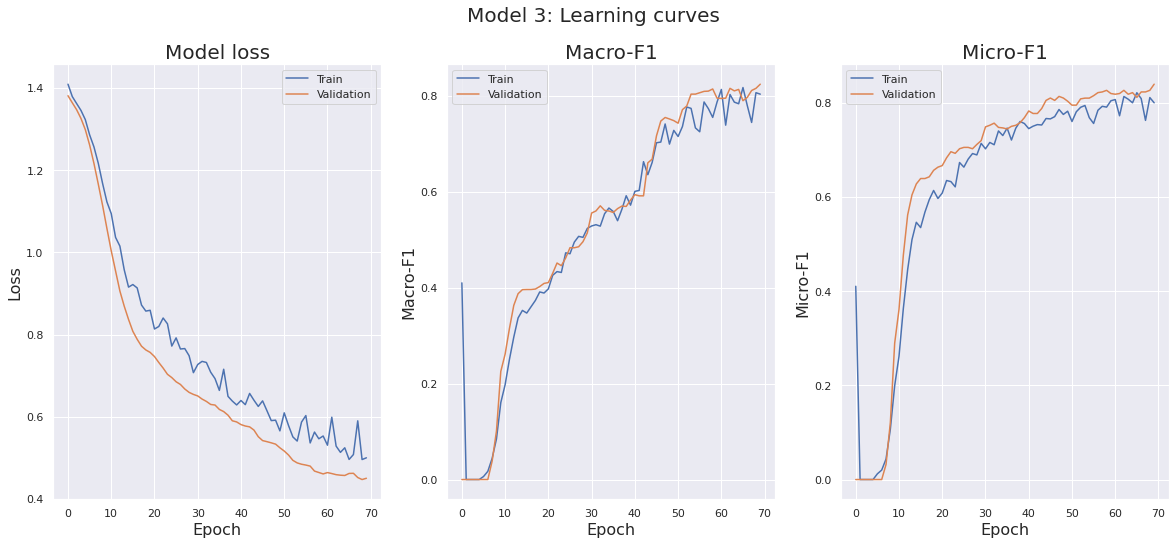

In [33]:
print_results(result, metrics_evaluate)
plot_results(history,'Model 3')

Hacemos un mucho más complicado, y vemos que tenemos overfitting. Pero tambien, no tenemos valores mucho más mejor por los valores F1. Introducimos dropout para evitar el overfitting. 

#### Modelo 4 - dropout



In [34]:
model = Sequential()
model.add(Dense(20*n_features, input_shape=(n_features,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20*n_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10*n_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10*n_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=metrics_evaluate)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 160)               1440      
                                                                 
 dropout_5 (Dropout)         (None, 160)               0         
                                                                 
 dense_12 (Dense)            (None, 160)               25760     
                                                                 
 dropout_6 (Dropout)         (None, 160)               0         
                                                                 
 dense_13 (Dense)            (None, 80)                12880     
                                                                 
 dropout_7 (Dropout)         (None, 80)                0         
                                                                 
 dense_14 (Dense)            (None, 80)               

In [35]:
%%time
epochs = 70
batch_size = 100

history = model.fit(x_train, y_train_oh, epochs=epochs, batch_size=batch_size, validation_split=0.2);
result = model.evaluate(x_test,y_test_oh)
clear_output()

CPU times: user 6.86 s, sys: 312 ms, total: 7.17 s
Wall time: 11.7 s


Results:
Loss 0.613
Recall 0.777
Precision 0.795
Accuracy 0.788
F1Score(name=macro_f1,dtype=float32,num_classes=4,average=macro,threshold=0.5) 0.792
F1Score(name=micro_f1,dtype=float32,num_classes=4,average=micro,threshold=0.5) 0.785


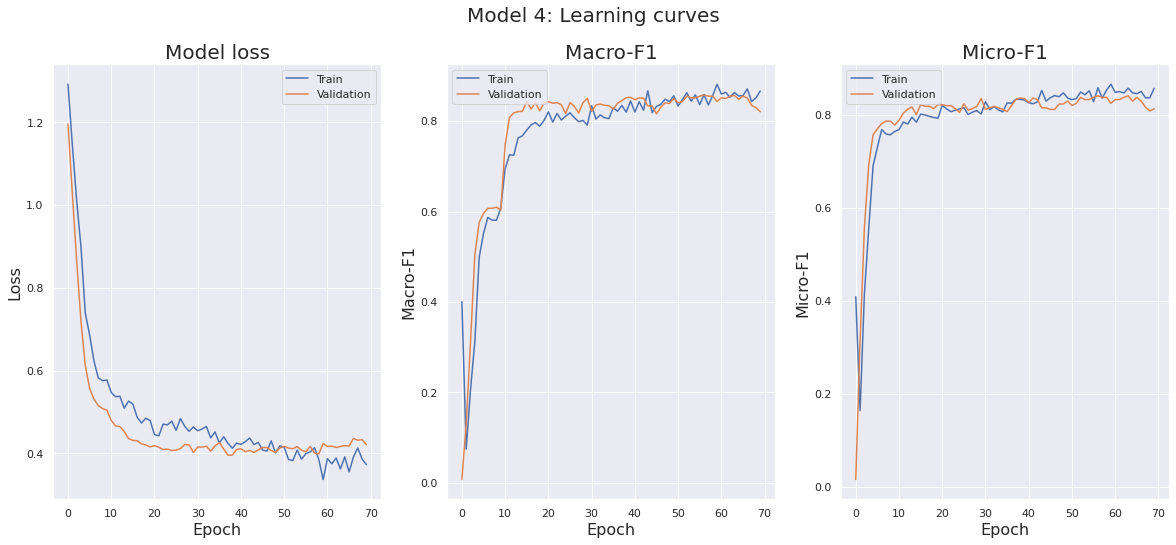

In [36]:
print_results(result, metrics_evaluate)
plot_results(history, 'Model 4')

Vemos que tenemos mucho menor overfitting, pero todavia pocito. Bajamos el numero de epochs tambien, para evitar overfitting. Ahora tampoco podemos mejorar los resultados del F1 score. 

#### Conclusion

Tenemos un modelo que tiene valores de F1 buenas, pero falta mucho todavia. Si necesita más tuning o los datos son demasiado parecido es una pregunta importante. 

Tenemos por fin macro- y micro-F1 score de 0.792 y 0.785.


### Clasificacion Binario

Aqui hacemos un clasificacion binario. Vamos a hacerlo con las clases MIT y NUC porque son los dos más grandes.

In [46]:
dt_binario = dt[(dt["class"] == 'NUC') | (dt["class"] == 'MIT')]
print(dt_binario.shape, dt.shape)

(672, 10) (1483, 10)


Con el binario tenemos casi la mitad de los datos. 

In [47]:
dt_binario['class'].value_counts() # vemos que solo tenemos de NUC y MIT

NUC    429
MIT    243
Name: class, dtype: int64

In [48]:
dt_binario.head()

,name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,ADT2_YEAST,-0.510384,1.373313,-0.231391,0.063665,-0.097623,-0.099165,0.520833,-0.528147,MIT
1,ADT3_YEAST,1.019295,0.969734,-0.116007,-0.811895,-0.097623,-0.099165,0.520833,-0.528147,MIT
2,AAR2_YEAST,0.582244,-0.483152,0.807069,-0.957821,-0.097623,-0.099165,0.693860,-0.528147,NUC
3,AATM_YEAST,-0.583226,-0.483152,-0.231391,2.033673,-0.097623,-0.099165,-0.344305,-0.528147,MIT
5,ABC1_YEAST,-0.000491,0.324006,-0.231391,2.836269,-0.097623,-0.099165,0.520833,-0.528147,MIT


In [52]:
from sklearn.model_selection import train_test_split
(x_train, x_test,y_train,y_test) = train_test_split(dt_binario.iloc[:,1:valoresCols],dt_binario.iloc[:,len(dt_binario.columns)-1],test_size=0.3)

In [58]:
print("Length of datasets: train -", x_train.shape[0],", test -",x_test.shape[0])

Length of datasets: train - 470 , test - 202


In [60]:
y_train

17      NUC
175     NUC
702     NUC
240     MIT
1408    NUC
       ... 
1138    NUC
631     MIT
37      MIT
421     NUC
1148    NUC
Name: class, Length: 470, dtype: object

In [66]:
y_train.replace(['NUC','MIT'],[0, 1], inplace=True)
y_test.replace(['NUC','MIT'],[0, 1], inplace=True)

print('Verificar que son numeros:',y_train.iloc[0],y_test.iloc[0])

n_features = len(x_train.columns)
print('Numero de features:',n_features)

metrics_evaluate = ['Recall', 'Precision', tf.keras.metrics.AUC(name='auc')]

Verificar que son numeros: 0 0
Numero de features: 8


In [107]:
# Función para graficar los resultados
def plot_bi_results(history, model_name):
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20, 8))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model loss', size=20)
  ax1.set_ylabel('Loss', size=16)
  ax1.set_xlabel('Epoch', size=16)
  ax1.set_xticks(range(0, epochs+10, 10))
  ax1.legend(['Train', 'Validation'], loc='upper right')

  ax2.plot(history.history['auc'])
  ax2.plot(history.history['val_auc'])
  ax2.set_title('AUC', size=20)
  ax2.set_ylabel('AUC', size=16)
  ax2.set_xlabel('Epoch', size=16)
  ax2.set_xticks(range(0, epochs+10, 10))
  ax2.legend(['Train', 'Validation'], loc='upper left')

  fig.suptitle(model_name+': Learning curves', size=20)
  plt.show()

def print_bi_results(result,metrics_evaluate):
  print('Results:\nLoss',np.round(result[0],3))
  for i in range(len(result)-1):
    print(metrics_evaluate[i],np.round(result[i+1],3))

def print_auc_score(result):
  print('Resulting AUC-score:', np.round(result[-1],3))

#### Model 1 - modelo simple

Probamos con un model muy simple.

In [81]:
epochs = 32
batch_size = 100

model = Sequential()
model.add(Dense(n_features, input_dim=n_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics_evaluate)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 8)                 72        
                                                                 
 dense_26 (Dense)            (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [82]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
result = model.evaluate(x_test,y_test)
clear_output()

Results:
Loss 0.443
Recall 0.77
Precision 0.803
AUC(name=auc,dtype=float32,num_thresholds=200,curve=ROC,summation_method=interpolation,multi_label=False,label_weights=None) 0.868


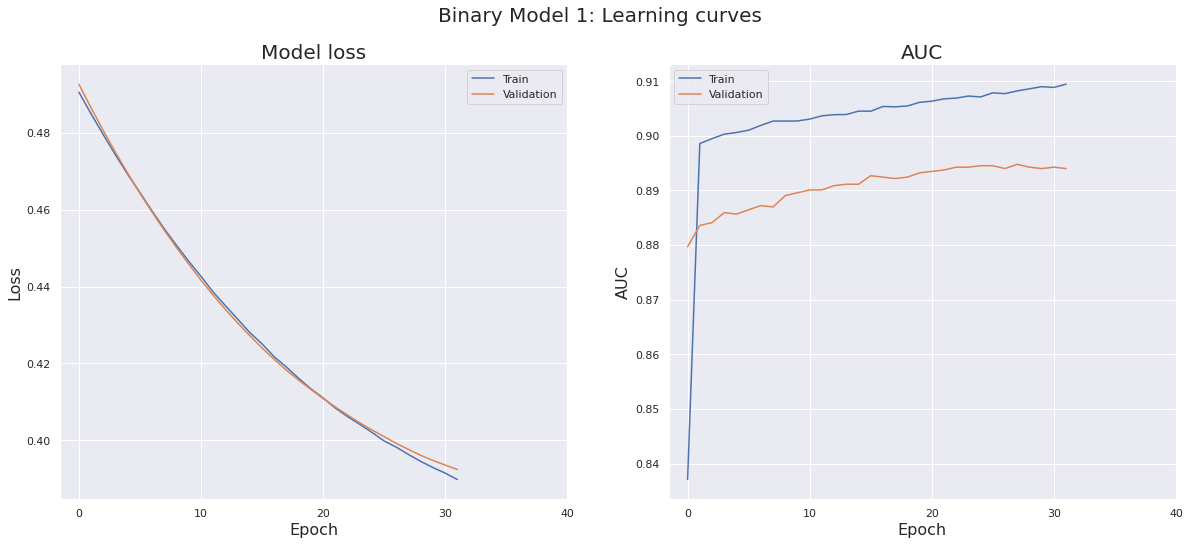

In [83]:
print_bi_results(result,metrics_evaluate)
plot_bi_results(history, 'Binary Model 1')

Vemos que tenemos un AUC-score bueno, pero el modelo esta underfitting. Vamos a ajumentar la complexidad. 

#### Model 2

Más complexidad, pero con dropout para eviter overfitting. 

In [92]:
epochs = 32
batch_size = 100

model = Sequential()
model.add(Dense(10*n_features, input_dim=n_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10*n_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics_evaluate)
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 80)                720       
                                                                 
 dropout_17 (Dropout)        (None, 80)                0         
                                                                 
 dense_36 (Dense)            (None, 80)                6480      
                                                                 
 dropout_18 (Dropout)        (None, 80)                0         
                                                                 
 dense_37 (Dense)            (None, 8)                 648       
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 7,857
Trainable params: 7,857
Non-train

In [93]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
result = model.evaluate(x_test,y_test)
clear_output()

Results:
Loss 0.447
Recall 0.757
Precision 0.778
AUC(name=auc,dtype=float32,num_thresholds=200,curve=ROC,summation_method=interpolation,multi_label=False,label_weights=None) 0.861


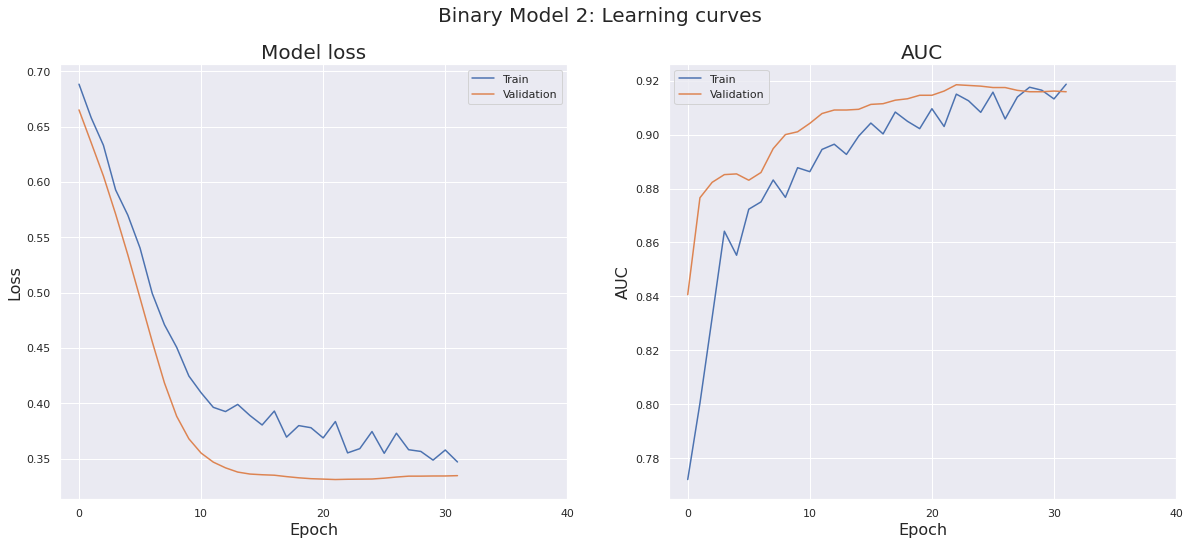

In [94]:
print_bi_results(result,metrics_evaluate)
plot_bi_results(history, 'Binary Model 2') 

Tenemos un modelo que por el valor de loss parece que tiene un fit bien, pero no tiene un AUC score mejor. Probamos un modelo un pocito más simple pero con más epochs.

#### Model 3

In [99]:
epochs = 100
batch_size = 100

model = Sequential()
model.add(Dense(10*n_features, input_dim=n_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5*n_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics_evaluate)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 80)                720       
                                                                 
 dropout_21 (Dropout)        (None, 80)                0         
                                                                 
 dense_44 (Dense)            (None, 40)                3240      
                                                                 
 dropout_22 (Dropout)        (None, 40)                0         
                                                                 
 dense_45 (Dense)            (None, 8)                 328       
                                                                 
 dense_46 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,297
Trainable params: 4,297
Non-train

In [100]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
result = model.evaluate(x_test,y_test)
clear_output()

Results:
Loss 0.477
Recall 0.77
Precision 0.77
AUC(name=auc,dtype=float32,num_thresholds=200,curve=ROC,summation_method=interpolation,multi_label=False,label_weights=None) 0.866
Resulting AUC-score: 0.866


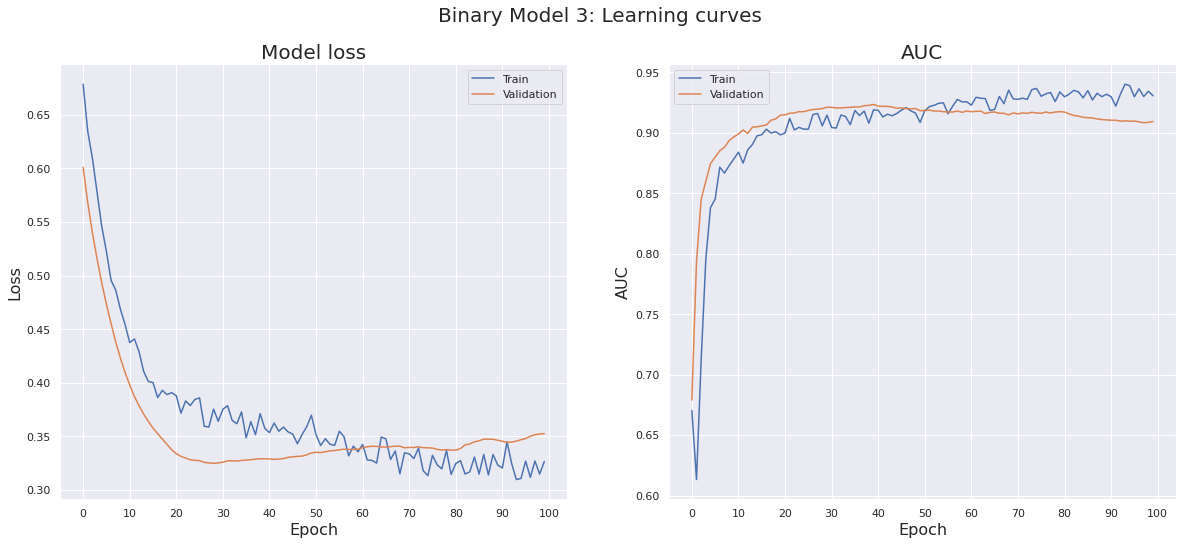

In [108]:
print_bi_results(result,metrics_evaluate)
print_auc_score(result)
plot_bi_results(history, 'Binary Model 3') 

#### Conclusion

Con los tres modelos tenemos un AUC-score que es lo mismo. Entonces, vemos que con un red neural más complicado no tenemos resultados mejores. Lo que falta en el score pueda ser de que los datos son muy parecidos. 